In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [84]:
import math
import matplotlib.pyplot as plt

In [85]:
def f(x):
    return 10*x**2-2*x+2

In [86]:
f(5.0)

242.0

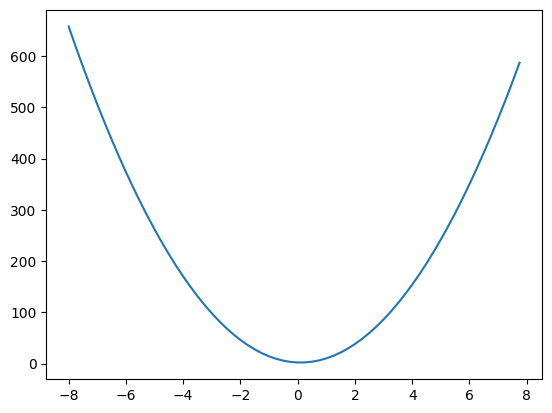

In [87]:
xs = np.arange(-8, 8, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [88]:
h=0.0000001
x=0.1
(f(x+h)-f(x))/h

1.0014211682118912e-06

In [89]:
a = 4.0
b = -2.0
c = 15.0
d = a*b+c
print(d)

7.0


In [90]:
h = 0.001

# inputs
a = 4.0
b = -2.0
c = 15.0

d1 = a*b+c
a += h
d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 7.0
d2 6.997999999999999
slope -2.000000000000668


In [91]:
h = 0.001

# inputs
a = 4.0
b = -2.0
c = 15.0

d1 = a*b+c
b += h
d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 7.0
d2 7.004
slope 3.9999999999995595


In [92]:
h = 0.001

# inputs
a = 4.0
b = -2.0
c = 15.0

d1 = a*b+c
c += h
d2 = a*b+c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 7.0
d2 7.0009999999999994
slope 0.9999999999994458


In [93]:
class Value:
    def __init__(self, data, _children=(), _op='', label=""):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1) # tanh
        out = Value(t, (self, ), "tanh")
        return out

a = Value(4.0, label="a")
b = Value(-2.0, label="b")
c = Value(15.0, label="c")
e = a*b
e.label = 'e'
d = e + c
d.label = 'd'
f = Value(-3.0, label="f")
L = d*f
L.label='L'
L

Value(data=-21.0)

In [94]:
from graphviz import Digraph

def trace(root):
    """Build a set of all nodes and edges in a graph."""
    nodes, edges = set(), set()

    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)

    build(root)
    return nodes, edges


def draw_dot(root):
    """Visualize the computation graph using Graphviz."""
    dot = Digraph(format="svg", graph_attr={"rankdir": "LR"})  # LR = left to right

    nodes, edges = trace(root)

    for n in nodes:
        uid = str(id(n))
        # Create a rectangular node for each value
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape="record")

        if n._op:
            # If this value is from an operation, create a separate op node
            op_id = uid + n._op
            dot.node(name=op_id, label=n._op)
            dot.edge(op_id, uid)  # connect op node to the value node

    for n1, n2 in edges:
        # Connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [95]:
L.grad = 1.0 # dL/dL = 1

f.grad = 7.0 # dL/df = d
d.grad = -3.0

In [96]:
# dL/dc = dL/dd * dd/dc
# dL/dd = -3
# d = e + c
# dd/dc = 1
# dL/dc = -3

c.grad = -3.0
e.grad = -3.0

In [97]:
# e = a*b
# de/da = b => -2
# dL/da = de/da * dL/de
# dL/da = -2 * -3 = 6
a.grad = 6
b.grad = -12

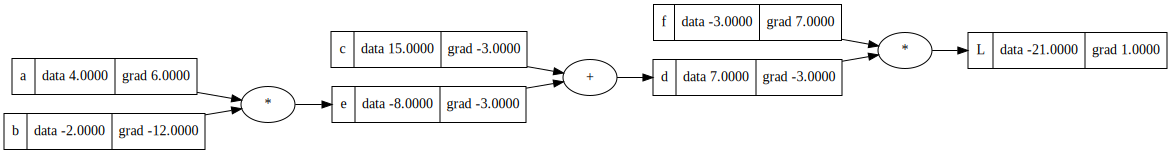

In [98]:
draw_dot(L)

In [99]:
a.data += 0.001 * a.grad
b.data += 0.001 * b.grad
c.data += 0.001 * c.grad
f.data += 0.001 * f.grad

e = a*b
d = e + c
L = d*f
print(L.data)

-20.762225504


In [100]:
def test():
    h = 0.001
    
    a = Value(4.0, label="a")
    b = Value(-2.0, label="b")
    c = Value(15.0, label="c")
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-3.0, label="f")
    L = d*f
    L.label='L'
    L1 = L.data

    a = Value(4.0, label="a")
    b = Value(-2.0 + h, label="b")
    c = Value(15.0, label="c")
    e = a*b
    e.label = 'e'
    d = e + c
    d.label = 'd'
    f = Value(-3.0, label="f")
    L = d*f
    L.label='L'
    L2 = L.data

    print((L2-L1)/h)

test()

-12.000000000000455


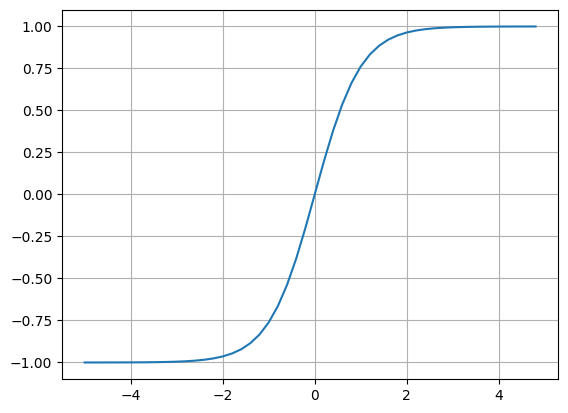

In [101]:
plt.plot(np.arange(-5, 5, 0.2), np.tanh(np.arange(-5, 5, 0.2))); plt.grid()

In [113]:
# inputs
x1 = Value(3.0, label="x1")
x2 = Value(0.0, label="x2")

# weights
w1 = Value(1.0, label="w1")
w2 = Value(-2.0, label="w2")

# bias
b = Value(-2.0, label="b")

# x1*w1+x2*w2+b

x1w1 = x1*w1
x1w1.label="x1w1"
x2w2 = x2*w2
x2w2.label="x2w2"

x1w1x2w2 = x1w1 + x2w2
x1w1x2w2.label="x1w1x2w2"

n = x1w1x2w2 + b
n.label="n"
out = n.tanh()
out.label = "out"

In [112]:
out.grad = 1.0

In [116]:
# out = tanh(n)
#dout/dn = 1 - tanh(n)^2
#dout/dn = 1 - out^2

1-out.data**2

0.41997434161402614

In [121]:
# approximately dout/dn =0.42
n.grad = 0.42

# n = x1w1x2w2+b => gradients also 0.42
b.grad = 0.42
x1w1x2w2.grad = 0.42

# x1w1x2w2 = x1w1+x2w2 => gradients also 0.42
x1w1.grad = 0.42
x2w2.grad = 0.42

In [124]:
# dout/dw1 = dout/dx1w1 * dx1w1/dw1
# dx1w1/dw1 = x1

w1.grad = x1.data * x1w1.grad
x1.grad = w1.data * x1w1.grad

w2.grad = x2.data * x2w2.grad
x1.grad = w2.data * x2w2.grad

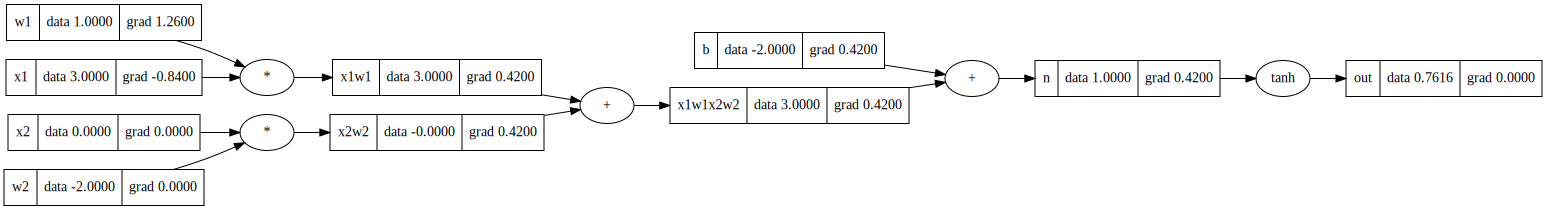

In [125]:
draw_dot(out)